In [1]:
import data, training, eval, process_data
import wandb, torch

import numpy as np

In [2]:
wandb.login()

#Laptop
#root = "C:/Users/20182573/Documents/CityScapes"

#Desktop
root = 'E:/Cityscapes'


lr_rate = 3e-4
epochs = 10
batch_size = 8
subsize = (256, 512)
wenb = True
train = True
verbose = False
save = True


weights = torch.tensor([0.0007, 0.0044, 0.0012, 0.0262, 0.0238, 0.0268, 0.0602, 0.0311, 0.0017,
        0.0203, 0.0069, 0.0237, 0.1081, 0.0040, 0.0973, 0.1133, 0.1122, 0.2590,
        0.0791])

weights = torch.nn.functional.pad(weights, (0, 34 - weights.size(0)), mode='constant', value=0)



Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: svenbbs. Use `wandb login --relogin` to force relogin


In [3]:

train_set, val_set = data.loadData(root=root, subsize=subsize,verbose=True)
train_dl, val_dl = data.getDataLoader(train_set=train_set, val_set=val_set, batch_size=batch_size)

Size of the training set: 4760
Size of the validation set: 1190


In [4]:
model, loss_fn, optimizer, device = training.buildModel(lr_rate=lr_rate,weights=weights, verbose=True)

Working on device: cuda:0


In [26]:
if wenb:

    run = wandb.init(
        # Set the project where this run will be logged
        project="CS_challenge", name="3.2.2",
        # Track hyperparameters and run metadata
        config={
            "learning_rate": {lr_rate},
            "epochs": {epochs},
            "Batch_size": {batch_size},
            "model version": 0.0,
            "resize": {subsize},
            "Optimizer": 'Adam',
            "Weights": True,
        },
    )

In [27]:
if train:
    training.trainModel(train_dl,val_dl,model,loss_fn,optimizer,device,epochs,wenb,verbose)
else:
    model.load_state_dict(torch.load('../Trained_models/3-1.pth'))
    


Done!


In [28]:
if wenb:
    run.finish()

average_validation_loss,▅█▄▃▃▃▄▂▅▁
epoch,▁▂▃▃▄▅▆▆▇█
train_loss,▅▄▅▅▂▅▆▅▄▃▄▆█▅▃▅▅▄▄▃▂▄▄▃▂▅▃▄▆▅▄▄▃▂▁▄▃▃▃▅
validation_loss,▂▅▃▅▅▅█▆▄▅▁▁▁▄▁▃▃▂▅▄▄▂▅▂▃▁▂▃▁▃▃▂▃▂▂▃▂▂▁▁
average_validation_loss,0.60671
epoch,10
train_loss,0.67934
validation_loss,0.65035


In [29]:
if save:
    torch.save(model.state_dict(), "model.pth")

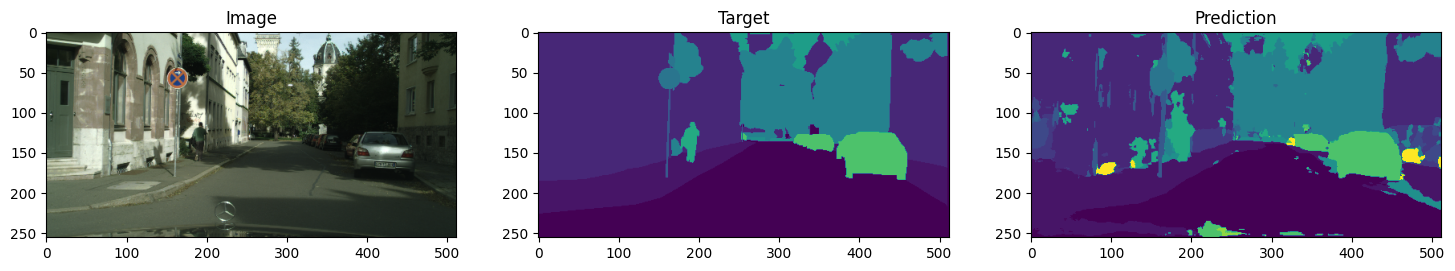

In [34]:
image, target = eval.getRandomImageAndTarget(val_set)
prediction = eval.predict(image, model, device, subsize)
eval.showImageTargetAndPrediction(image, target, prediction)

In [31]:
averageIOU = eval.calculateIOU(val_set, model, device, subsize, True)

c:\Users\Sven\Documents\GitHub\CS_challenge\Guided\eval.py:73: RuntimeWarning: divide by zero encountered in scalar divide
  print(f'[{sample}/{size}] mean IOU: {IOU/sample}')


[0/1190] mean IOU: inf
[1/1190] mean IOU: 1.2032394409179688
[2/1190] mean IOU: 0.8768272399902344
[3/1190] mean IOU: 0.7606124877929688
[4/1190] mean IOU: 0.7526435852050781
[5/1190] mean IOU: 0.735833740234375
[6/1190] mean IOU: 0.7095909118652344
[7/1190] mean IOU: 0.7024612426757812
[8/1190] mean IOU: 0.6916580200195312
[9/1190] mean IOU: 0.6722200181749132
[10/1190] mean IOU: 0.6678939819335937
[11/1190] mean IOU: 0.6516182639382102
[12/1190] mean IOU: 0.6516501108805338
[13/1190] mean IOU: 0.6576291597806491
[14/1190] mean IOU: 0.6491361345563617
[15/1190] mean IOU: 0.6467732747395833
[16/1190] mean IOU: 0.6396121978759766
[17/1190] mean IOU: 0.6431148753446692
[18/1190] mean IOU: 0.6443027920193143
[19/1190] mean IOU: 0.6470108032226562
[20/1190] mean IOU: 0.6453079223632813
[21/1190] mean IOU: 0.6432553245907738
[22/1190] mean IOU: 0.6446963223544034
[23/1190] mean IOU: 0.6477949722953464
[24/1190] mean IOU: 0.6450535456339518
[25/1190] mean IOU: 0.6444454956054687
[26/1190] me

In [32]:
averageIOU

0.6370769212225906